In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
kobe = pd.read_csv(r'C:\Users\17036\Desktop\mlnn\data\kobe.csv')
kobe.dropna(inplace=True)

In [3]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [4]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [5]:
kobe

action_type combined_shot_type  game_event_id   game_id  \
1               Jump Shot          Jump Shot             12  20000012   
2               Jump Shot          Jump Shot             35  20000012   
3               Jump Shot          Jump Shot             43  20000012   
4       Driving Dunk Shot               Dunk            155  20000012   
5               Jump Shot          Jump Shot            244  20000012   
...                   ...                ...            ...       ...   
30691  Driving Layup Shot              Layup            382  49900088   
30692           Jump Shot          Jump Shot            397  49900088   
30694   Running Jump Shot          Jump Shot            426  49900088   
30695           Jump Shot          Jump Shot            448  49900088   
30696           Jump Shot          Jump Shot            471  49900088   

           lat  loc_x  loc_y       lon  minutes_remaining  period  ...  \
1      34.0443   -157      0 -118.4268                 10       1  ...   
2      33.9093   -101    135 -118.3708                  7       1  ...   
3      33.8693    138    175 -118.1318                  6       1  ...   
4      34.0443      0      0 -118.2698                  6       2  ...   
5      34.0553   -145    -11 -118.4148                  9       3  ...   
...        ...    ...    ...       ...                ...     ...  ...   
30691  34.0443      0      0 -118.2698                  7       4  ...   
30692  33.9963      1     48 -118.2688                  6       4  ...   
30694  33.8783   -134    166 -118.4038                  3       4  ...   
30695  33.7773     31    267 -118.2388                  2       4  ...   
30696  33.9723      1     72 -118.2688                  0       4  ...   

            shot_type         shot_zone_area        shot_zone_basic  \
1      2PT Field Goal           Left Side(L)              Mid-Range   
2      2PT Field Goal   Left Side Center(LC)              Mid-Range   
3      2PT Field Goal  Right Side Center(RC)              Mid-Range   
4      2PT Field Goal              Center(C)        Restricted Area   
5      2PT Field Goal           Left Side(L)              Mid-Range   
...               ...                    ...                    ...   
30691  2PT Field Goal              Center(C)        Restricted Area   
30692  2PT Field Goal              Center(C)  In The Paint (Non-RA)   
30694  2PT Field Goal   Left Side Center(LC)              Mid-Range   
30695  3PT Field Goal              Center(C)      Above the Break 3   
30696  2PT Field Goal              Center(C)  In The Paint (Non-RA)   

       shot_zone_range     team_id           team_name   game_date  \
1             8-16 ft.  1610612747  Los Angeles Lakers  2000-10-31   
2            16-24 ft.  1610612747  Los Angeles Lakers  2000-10-31   
3            16-24 ft.  1610612747  Los Angeles Lakers  2000-10-31   
4      Less Than 8 ft.  1610612747  Los Angeles Lakers  2000-10-31   
5             8-16 ft.  1610612747  Los Angeles Lakers  2000-10-31   
...                ...         ...                 ...         ...   
30691  Less Than 8 ft.  1610612747  Los Angeles Lakers  2000-06-19   
30692  Less Than 8 ft.  1610612747  Los Angeles Lakers  2000-06-19   
30694        16-24 ft.  1610612747  Los Angeles Lakers  2000-06-19   
30695          24+ ft.  1610612747  Los Angeles Lakers  2000-06-19   
30696  Less Than 8 ft.  1610612747  Los Angeles Lakers  2000-06-19   

           matchup opponent  shot_id  
1        LAL @ POR      POR        2  
2        LAL @ POR      POR        3  
3        LAL @ POR      POR        4  
4        LAL @ POR      POR        5  
5        LAL @ POR      POR        6  
...            ...      ...      ...  
30691  LAL vs. IND      IND    30692  
30692  LAL vs. IND      IND    30693  
30694  LAL vs. IND      IND    30695  
30695  LAL vs. IND      IND    30696  
30696  LAL vs. IND      IND    30697  

[25697 rows x 25 columns]

In [6]:
kobe.iloc[0]

action_type                    Jump Shot
combined_shot_type             Jump Shot
game_event_id                         12
game_id                         20000012
lat                              34.0443
loc_x                               -157
loc_y                                  0
lon                            -118.4268
minutes_remaining                     10
period                                 1
playoffs                               0
season                           2000-01
seconds_remaining                     22
shot_distance                         15
shot_made_flag                       0.0
shot_type                 2PT Field Goal
shot_zone_area              Left Side(L)
shot_zone_basic                Mid-Range
shot_zone_range                 8-16 ft.
team_id                       1610612747
team_name             Los Angeles Lakers
game_date                     2000-10-31
matchup                        LAL @ POR
opponent                             POR
shot_id         

In [7]:
kobe['parsed_date'] = pd.to_datetime(kobe.game_date)

In [8]:
kobe.parsed_date.dt.day_of_week

1        1
2        1
3        1
4        1
5        1
        ..
30691    0
30692    0
30694    0
30695    0
30696    0
Name: parsed_date, Length: 25697, dtype: int64

# Data Munging
# Feature Selection

In [9]:
kobe['year'] = kobe.parsed_date.dt.year
kobe['dayofyear'] = kobe.parsed_date.dt.dayofyear
kobe['dayofweek'] = kobe.parsed_date.dt.dayofweek

In [10]:
kobe.groupby([kobe.year, kobe.shot_made_flag]).action_type.count()

year  shot_made_flag
1996  0.0                 43
      1.0                 26
1997  0.0                356
      1.0                269
1998  0.0                283
      1.0                216
1999  0.0                530
      1.0                453
2000  0.0                907
      1.0                809
2001  0.0                751
      1.0                646
2002  0.0               1038
      1.0                822
2003  0.0                913
      1.0                695
2004  0.0                860
      1.0                646
2005  0.0                699
      1.0                568
2006  0.0                938
      1.0                825
2007  0.0                895
      1.0                733
2008  0.0                941
      1.0                858
2009  0.0               1049
      1.0                924
2010  0.0                949
      1.0                744
2011  0.0                591
      1.0                480
2012  0.0               1051
      1.0             

In [11]:
kobe['angle'] = 2*np.arctan2(kobe.loc_x, kobe.loc_y)/np.pi

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

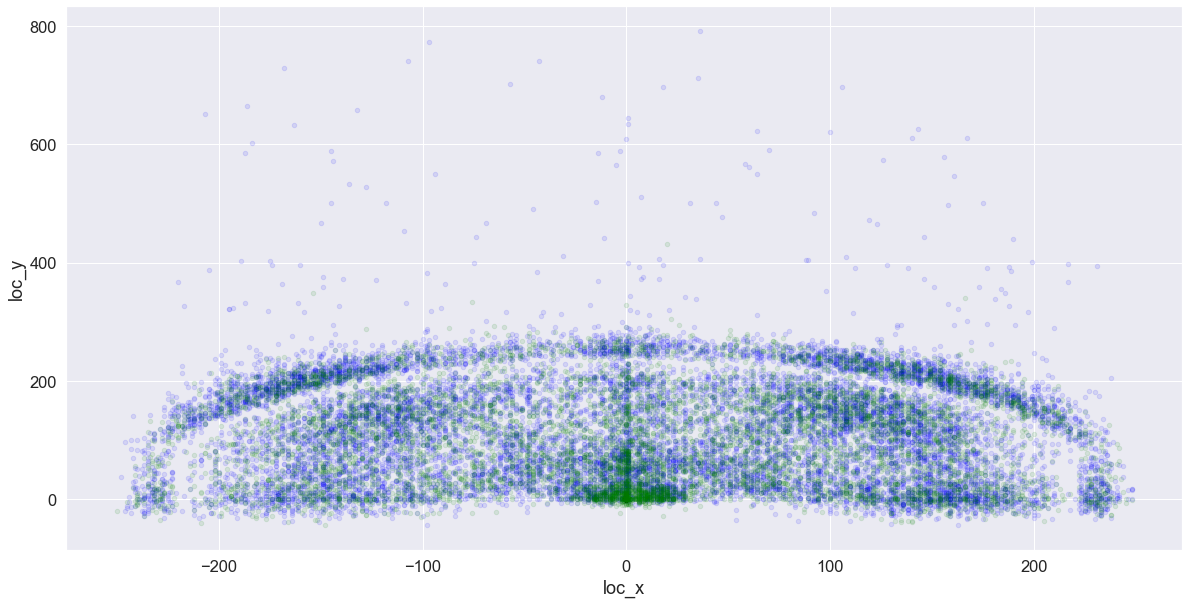

In [12]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag == 0].plot(kind = 'scatter', x = 'loc_x', y = 'loc_y', color = 'blue', alpha = 0.1, ax = ax)
kobe[kobe.shot_made_flag == 1].plot(kind = 'scatter', x = 'loc_x', y = 'loc_y', color = 'green', alpha = 0.1, ax = ax)

<AxesSubplot:>

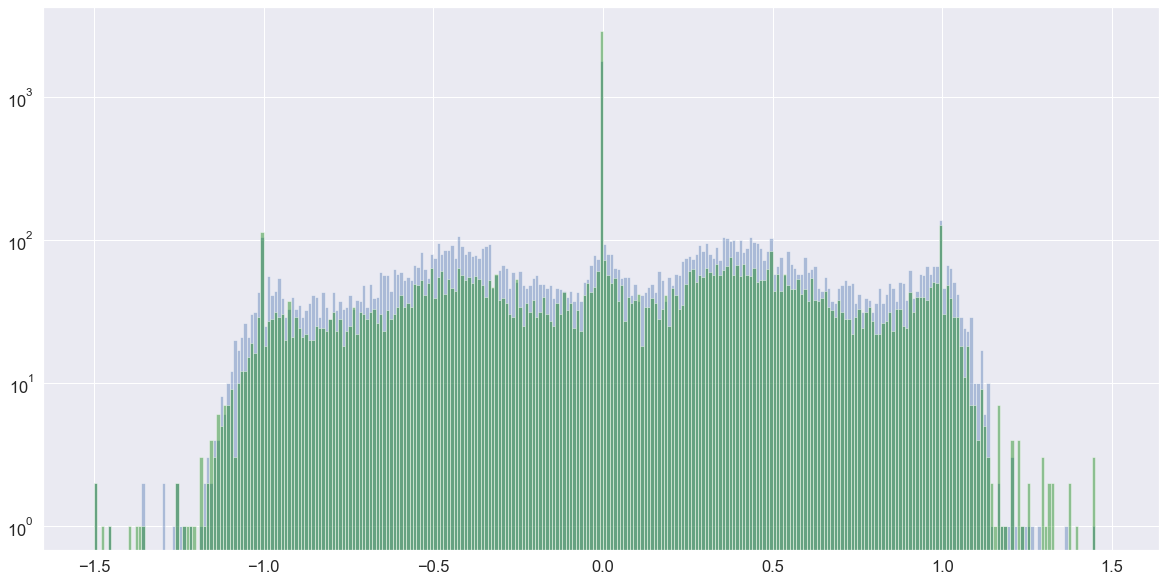

In [13]:
kobe[kobe.shot_made_flag == 0].angle.hist(bins=np.arange(-1.5,1.5,0.01), alpha = 0.4, log=True)
kobe[kobe.shot_made_flag == 1].angle.hist(bins=np.arange(-1.5,1.5,0.01), alpha = 0.4, color = 'green', log=True)

In [14]:
# fit a logistic regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = LogisticRegression()
model.fit(X, y)
kobe['pred'] = model.predict(X)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(kobe.shot_made_flag, kobe.pred.round()))
confusion_matrix(kobe.shot_made_flag, kobe.pred.round())

0.5971903335019653


array([[10626,  3606],
       [ 6745,  4720]], dtype=int64)

In [15]:
model.coef_

array([[-0.04392785,  0.01034501]])

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(kobe.shot_made_flag, kobe.pred.round()))

              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67     14232
         1.0       0.57      0.41      0.48     11465

    accuracy                           0.60     25697
   macro avg       0.59      0.58      0.57     25697
weighted avg       0.59      0.60      0.59     25697



In [37]:
# Try to improve with a Linear SVC
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model_lsvc = LinearSVC()
model_lsvc.fit(X, y)
kobe['pred_lsvc'] = model_lsvc.predict(X)

C:\Users\17036\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
print(accuracy_score(kobe.shot_made_flag, kobe.pred_lsvc.round()))
confusion_matrix(kobe.shot_made_flag, kobe.pred_lsvc.round())

0.6079308868739541


array([[11944,  2288],
       [ 7787,  3678]], dtype=int64)

In [21]:
print(classification_report(kobe.shot_made_flag, kobe.pred_lsvc.round()))

              precision    recall  f1-score   support

         0.0       0.61      0.84      0.70     14232
         1.0       0.62      0.32      0.42     11465

    accuracy                           0.61     25697
   macro avg       0.61      0.58      0.56     25697
weighted avg       0.61      0.61      0.58     25697



In [22]:
model_svc = SVC()
model_svc.fit(X, y)
kobe['pred_svc'] = model_svc.predict(X)

In [23]:
print(accuracy_score(kobe.shot_made_flag, kobe.pred_svc.round()))
confusion_matrix(kobe.shot_made_flag, kobe.pred_svc.round())

0.6099155543448651


array([[12146,  2086],
       [ 7938,  3527]], dtype=int64)

In [33]:
print(classification_report(kobe.shot_made_flag, kobe.pred_svc.round()))

              precision    recall  f1-score   support

         0.0       0.60      0.85      0.71     14232
         1.0       0.63      0.31      0.41     11465

    accuracy                           0.61     25697
   macro avg       0.62      0.58      0.56     25697
weighted avg       0.62      0.61      0.58     25697



In [43]:
from sklearn import preprocessing

In [44]:
X

shot_distance  minutes_remaining
1                 15                 10
2                 16                  7
3                 22                  6
4                  0                  6
5                 14                  9
...              ...                ...
30691              0                  7
30692              4                  6
30694             21                  3
30695             26                  2
30696              7                  0

[25697 rows x 2 columns]

In [46]:
X_scaled = preprocessing.scale(X)
X_scaled

array([[ 0.16433902,  1.48105426],
       [ 0.27085183,  0.6120956 ],
       [ 0.90992869,  0.32244271],
       ...,
       [ 0.80341588, -0.54651594],
       [ 1.33597993, -0.83616883],
       [-0.68776345, -1.4154746 ]])

In [53]:
model_n = KNeighborsClassifier(5)
model_n.fit(X_scaled, y)
kobe['pred_n'] = model_n.predict(X_scaled)

In [54]:
print(accuracy_score(kobe.shot_made_flag, kobe.pred_n.round()))
confusion_matrix(kobe.shot_made_flag, kobe.pred_n.round())

0.553994629723314


array([[9004, 5228],
       [6233, 5232]], dtype=int64)

In [55]:
print(classification_report(kobe.shot_made_flag, kobe.pred_n.round()))

              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61     14232
         1.0       0.50      0.46      0.48     11465

    accuracy                           0.55     25697
   macro avg       0.55      0.54      0.54     25697
weighted avg       0.55      0.55      0.55     25697



In [56]:
feature_cols2 = ['shot_distance', 'minutes_remaining', 'angle', 'dayofyear', 'year']
X2 = kobe[feature_cols2]

In [70]:
model_svc2 = SVC()
model_svc2.fit(X2, y)
kobe['pred_svc2'] = model_svc2.predict(X2)

In [71]:
print(accuracy_score(kobe.shot_made_flag, kobe.pred_svc2.round()))
confusion_matrix(kobe.shot_made_flag, kobe.pred_svc2.round())

0.5538389695295171


array([[14232,     0],
       [11465,     0]], dtype=int64)